### Supplimental document

In [248]:
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
from agent_Q import LearningAgent as Q_learner
from agent_Q_2states import LearningAgent as Q_learner_2s

from agent_random import LearningAgent as Random_learner
import operator
import matplotlib.pyplot as plt

%pylab inline
## Makes sure code from scripts above are loaded.
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [263]:
def simulate_env(learner,Num_sim = 1000,num_dummies = 3,gamma = 0.1,alpha = 0.1):
    e = Environment() 
    a = e.create_agent(learner) 
    e.num_dummies = num_dummies
    a.gamma = gamma
    a.alpha = alpha
    Q_all = []
    given_time_all = []
    steps_all = []
    for i in range(Num_sim):
        e.set_primary_agent(a, enforce_deadline=False)  
        sim = Simulator(e, update_delay=-1, display=False)  
        sim.run(n_trials=1)
        steps_all.append(e.steps_end)
        given_time_all.append(e.given_time)
    Q_agent = a.Q_prev
    return steps_all,given_time_all,Q_agent

In [249]:
e = Environment() 
a = e.create_agent(Q_learner_2s) 
Q_all_3_2s = []
given_time_all_3_2s = []
steps_all_3_2s = []
for i in range(1000):
    e.set_primary_agent(a, enforce_deadline=False)  
    sim = Simulator(e, update_delay=-1, display=False)  
    sim.run(n_trials=1)
    steps_all_3_2s.append(e.steps_end)
    given_time_all_3_2s.append(e.given_time)


Q_agent_3_2s = a.Q_prev

In [250]:
e = Environment() 
a = e.create_agent(Q_learner) 
Q_all_3 = []
given_time_all_3 = []
steps_all_3 = []
for i in range(1000):
    e.set_primary_agent(a, enforce_deadline=False)  
    sim = Simulator(e, update_delay=-1, display=False)  
    sim.run(n_trials=1)
    steps_all_3.append(e.steps_end)
    given_time_all_3.append(e.given_time)


Q_agent_3 = a.Q_prev

In [251]:
e = Environment() 
a = e.create_agent(Q_learner) 
Q_all_20 = []
steps_all_20 = []
given_time_all_20 = []

for i in range(1000):
    e.set_primary_agent(a, enforce_deadline=False)  
    sim = Simulator(e, update_delay=-1, display=False)  
    sim.run(n_trials=1)
    steps_all_20.append(e.steps_end)
    given_time_all_20.append(e.given_time)


Q_agent_20 = a.Q_prev

In [252]:
e = Environment() 
a = e.create_agent(Random_learner) 
Q_all_3_r = []
given_time_all_3_r = []
steps_all_3_r = []
for i in range(1000):
    e.set_primary_agent(a, enforce_deadline=False)  
    sim = Simulator(e, update_delay=-1, display=False)  
    sim.run(n_trials=1)
    steps_all_3_r.append(e.steps_end)
    given_time_all_3_r.append(e.given_time)




Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.
Environment.step(): Primary agent hit hard time limit (-100)! Trial aborted.

In [253]:
ind_not_reached = [i for i in range(len(given_time_all_3_r)) \
                   if ((steps_all_3_r[i])<-99)]
steps_not_reached = [steps_all_3_r[i] for i in range(len(given_time_all_3_r)) \
                     if ((steps_all_3_r[i])<-99)]



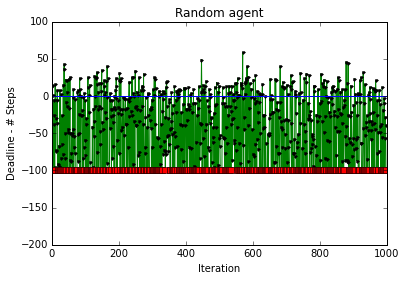

In [254]:
plt.plot(steps_all_3_r,'g',steps_all_3_r,'k.')
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,1000],[0,0])
plt.ylim(-200,100)
plt.title('Random agent')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')



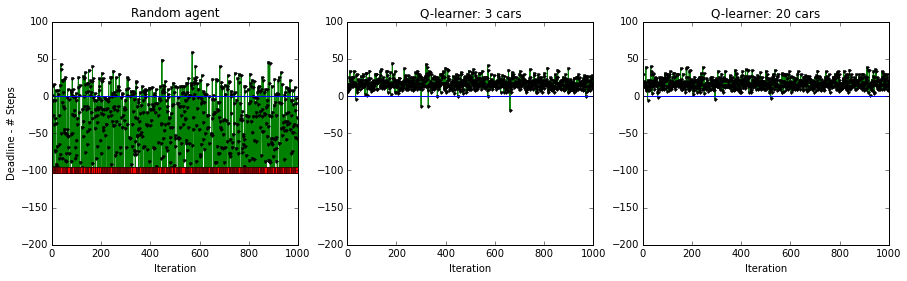

In [255]:
plt.figure(figsize=(15,4));

plt.subplot(1,3,1)
plt.plot(steps_all_3_r,'g',steps_all_3_r,'k.')
plt.ylim(-200,100)
plt.title('Random agent')
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')
plt.plot(ind_not_reached,steps_not_reached,'rs')
plt.plot([0,1000],[0,0])


plt.subplot(1,3,2)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.title('Q-learner: 3 cars')
plt.xlabel('Iteration')
plt.ylim(-200,100)
plt.plot([0,1000],[0,0])

plt.subplot(1,3,3)
plt.plot(steps_all_20,'g',steps_all_20,'k.')
plt.title('Q-learner: 20 cars')
plt.xlabel('Iteration')
plt.ylim(-200,100)
plt.plot([0,1000],[0,0])


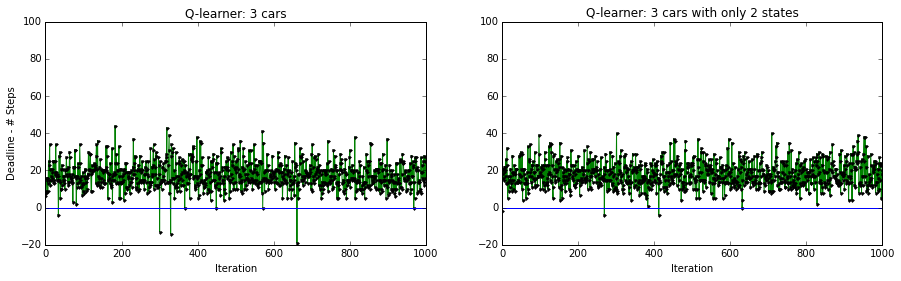

In [256]:
plt.figure(figsize=(15,4));

plt.subplot(1,2,1)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.title('Q-learner: 3 cars')
plt.xlabel('Iteration')
plt.ylim(-20,100)
plt.plot([0,1000],[0,0])
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')

plt.subplot(1,2,2)
plt.plot(steps_all_3_2s,'g',steps_all_3_2s,'k.')
plt.title('Q-learner: 3 cars with only 2 states')
plt.xlabel('Iteration')
plt.ylim(-20,100)
plt.plot([0,1000],[0,0])


In [257]:
Q_agent_20_srt = sorted(Q_agent_20.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_3_srt = sorted(Q_agent_3.items(),key=operator.itemgetter(1),reverse=True)
Q_agent_3_2s_srt = sorted(Q_agent_3_2s.items(),key=operator.itemgetter(1),reverse=True)

In [258]:
Q_agent_3_srt[0:10]

[('green,None,None,None,forward,forward', 3.596217552860348e+36),
 ('green,None,None,None,left,left', 36148582.31150409),
 ('red,None,None,None,right,right', 7304392.451434989),
 ('green,None,None,None,right,right', 1654660.1724263104),
 ('green,left,None,None,forward,forward', 64.15835366905922),
 ('green,None,left,None,forward,forward', 38.967578691378634),
 ('green,None,None,forward,forward,forward', 37.74072550280877),
 ('green,None,None,left,forward,forward', 35.98906144490114),
 ('green,None,forward,None,forward,forward', 28.406862744296618),
 ('green,None,None,right,forward,forward', 17.250987129328273)]

In [259]:
Q_agent_20_srt[0:10]

[('green,None,None,None,forward,forward', 1.6037688491833772e+36),
 ('green,None,None,None,left,left', 13361992.63708427),
 ('red,None,None,None,right,right', 6157845.4111933),
 ('green,None,None,None,right,right', 4959418.190117758),
 ('green,None,forward,None,forward,forward', 39.10624266700016),
 ('green,left,None,None,forward,forward', 38.59828500201229),
 ('green,None,left,None,forward,forward', 31.09593208391436),
 ('green,None,None,left,forward,forward', 27.8043669897408),
 ('green,None,None,forward,forward,forward', 20.57503076224719),
 ('green,None,right,None,forward,forward', 18.864380511391687)]

In [260]:
Q_agent_3_2s_srt[0:10]

[('green,forward,forward', 5.610590527567043),
 ('red,right,right', 3.6250941075045944),
 ('green,left,left', 2.438209656902422),
 ('green,right,right', 2.435022645258388),
 ('red,forward,None', 0.0),
 ('red,left,None', 0.0),
 ('green,left,right', 0),
 ('red,right,None', 0),
 ('green,right,None', 0),
 ('green,right,forward', 0)]

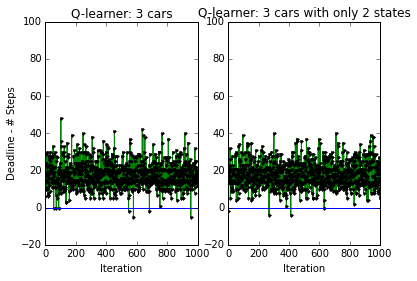

In [261]:
e = Environment() 
a = e.create_agent(Q_learner) 
a.gamma = .5
a.alpha = 1

Q_all_3 = []
given_time_all_3 = []
steps_all_3 = []
for i in range(1000):
    e.set_primary_agent(a, enforce_deadline=False)  
    sim = Simulator(e, update_delay=-1, display=False)  
    sim.run(n_trials=1)
    steps_all_3.append(e.steps_end)
    given_time_all_3.append(e.given_time)
Q_agent_3 = a.Q_prev

plt.subplot(1,2,1)
plt.plot(steps_all_3,'g',steps_all_3,'k.')
plt.title('Q-learner: 3 cars')
plt.xlabel('Iteration')
plt.ylim(-20,100)
plt.plot([0,1000],[0,0])
plt.xlabel('Iteration')
plt.ylabel('Deadline - # Steps')

plt.subplot(1,2,2)
plt.plot(steps_all_3_2s,'g',steps_all_3_2s,'k.')
plt.title('Q-learner: 3 cars with only 2 states')
plt.xlabel('Iteration')
plt.ylim(-20,100)
plt.plot([0,1000],[0,0])
